In [2]:
import os
import subprocess
import zipfile

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np
import open3d as o3d

current_directory = os.getcwd()

## Extraction of sensor files (scenexxxx_xx.sens)

In [2]:
scans_directory = "/cluster/project/cvg/data/scannet/scans"
output_dir = os.path.join(current_directory, "data/scans")

def run_reader(filename, output_path):
    command = [
        "python",
        "scripts/SensReader/reader.py",
        "--filename",
        filename,
        "--output_path",
        output_path,
        #"--export_depth_images",
        "--export_color_images"
        #"--export_poses",
        #"--export_intrinsics"
    ]
    subprocess.run(command)

for folder in os.listdir(scans_directory):
    if folder.startswith("scene"):
        sensor_file = os.path.join(scans_directory, folder, f"{folder}.sens")
        output_path = os.path.join(output_dir, folder)
        if os.path.isfile(sensor_file):
            run_reader(sensor_file, output_path)
        else:
            print(f"Sensor file not found for {folder}")
    # break to be commented
    break

Namespace(filename='/cluster/project/cvg/data/scannet/scans/scene0000_00/scene0000_00.sens', output_path='/cluster/home/lnonino/Making-CLIP-features-multiview-consistent/data/scans/scene0000_00', export_depth_images=False, export_color_images=True, export_poses=False, export_intrinsics=False)
loading /cluster/project/cvg/data/scannet/scans/scene0000_00/scene0000_00.sens...loaded!
exporting 5578 color frames to /cluster/home/lnonino/Making-CLIP-features-multiview-consistent/data/scans/scene0000_00/color


## Extraction of 2D instance-label (scenexxxx_xx_2d-instance-filt.zip & scenexxxx_xx_2d-label-filt.zip)

### Unzip files

In [3]:
zip_files_dir = "/cluster/project/cvg/data/scannet/scans"
output_dir = os.path.join(current_directory, "data/2d_segment")

def unzip_file(zip_file_path, output_dir):
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(output_dir)

for folder in os.listdir(zip_files_dir):
    if folder.startswith("scene"):
        zip_file = os.path.join(zip_files_dir, folder, f"{folder}_2d-instance-filt.zip")
        output_path = os.path.join(output_dir, f"{folder}")
        unzip_file(zip_file, output_path)
        zip_file = os.path.join(zip_files_dir, folder, f"{folder}_2d-label-filt.zip")
        output_path = os.path.join(output_dir, f"{folder}")
        unzip_file(zip_file, output_path)
    # break to be commented
    break

### Convert instance and label images

In [ ]:
input_dir = os.path.join(current_directory, "data/2d_segment")
map_file = os.path.join(current_directory, "data/scannetv2-labels.combined.tsv")

def run_convert_instance_image(map_file, input_img, label_img, output_img):
    command = [
        "python",
        "scripts/BenchmarkScripts/2d_helpers/convert_scannet_instance_image.py",
        "--input_instance_file",
        input_img,
        "--input_label_file",
        label_img,
        "--label_map_file",
        map_file,
        "--output_file",
        output_img
    ]
    subprocess.run(command)

def run_convert_label_image(map_file, label_img, output_img):
    command = [
        "python",
        "scripts/BenchmarkScripts/2d_helpers/convert_scannet_label_image.py",
        "--input_file",
        label_img,
        "--label_map_file",
        map_file,
        "--output_file",
        output_img
    ]
    subprocess.run(command)

for folder in os.listdir(input_dir):
    if folder.startswith("scene"):
        instance_dir = os.path.join(input_dir, folder, "instance-filt")
        label_dir = os.path.join(input_dir, folder, "label-filt")
        for img in os.listdir(instance_dir):
            run_convert_instance_image(map_file, os.path.join(instance_dir, img), os.path.join(label_dir, img), os.path.join(instance_dir, img))
            run_convert_label_image(map_file, os.path.join(label_dir, img), os.path.join(label_dir, img))

### Show sample image segmentation

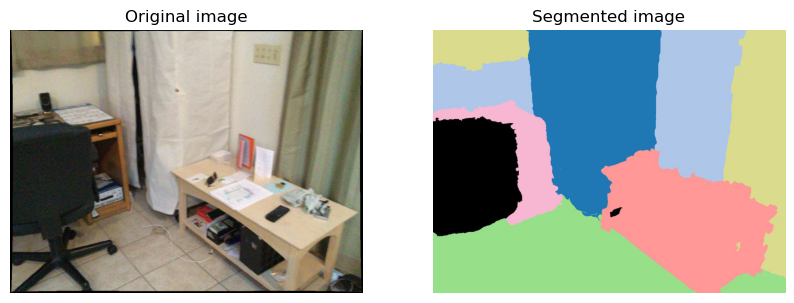

In [4]:
image1_path = os.path.join(current_directory, "data/scans/scene0000_00/color/0.jpg")
image2_path = os.path.join(current_directory, "data/2d_segment/scene0000_00/instance-filt/0_vis-labels.jpg")
image1 = mpimg.imread(image1_path)
image2 = mpimg.imread(image2_path)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(image1)
axes[0].axis('off')
axes[0].set_title('Original image')
axes[1].imshow(image2)
axes[1].axis('off')
axes[1].set_title('Segmented image')

plt.show()